In [3]:
%cd ..


/home/druhe/rail1/src/cnf


In [45]:
from algebra.cliffordalgebra import CliffordAlgebra
import matplotlib.pyplot as plt

import numpy as np
import torch
import math

torch.set_default_dtype(torch.float64)

In [38]:
cl = CliffordAlgebra((-1, 1, 1))

In [39]:
data = np.load('u.npy')

In [40]:
t = 15

In [41]:
def show_data(data, t):
    fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

    max = data[t, :, :, 0].max()
    min = data[t, :, :, 0].min()

    ax[0].imshow(data[t, :, :, 0], vmin=min, vmax=max)
    ax[1].imshow(data[t, :, :, 1], vmin=min, vmax=max)
    ax[2].imshow(data[t, :, :, 2], vmin=min, vmax=max)

    # colorbar
    cax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
    fig.colorbar(ax[2].imshow(data[t, :, :, 2], vmin=min, vmax=max), cax=cax)

    plt.show()

In [46]:
data_cl = cl.embed_grade(torch.from_numpy(data), 2)
data_norm_cl = data_cl / cl.norm(data_cl, safe_abs_sqrt=True)

coef = (data_norm_cl.abs().log() - math.log(1e5)) / (math.log(1e8) - math.log(1e5))

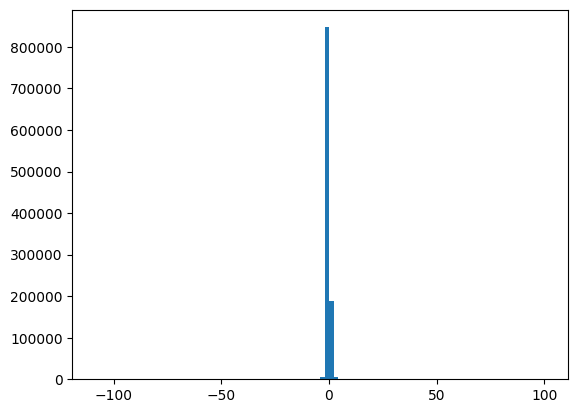

In [54]:
# plot histogram of data_norm_cl
fig, ax = plt.subplots()
ax.hist(data_norm_cl.numpy().flatten(), bins=100)
plt.show()

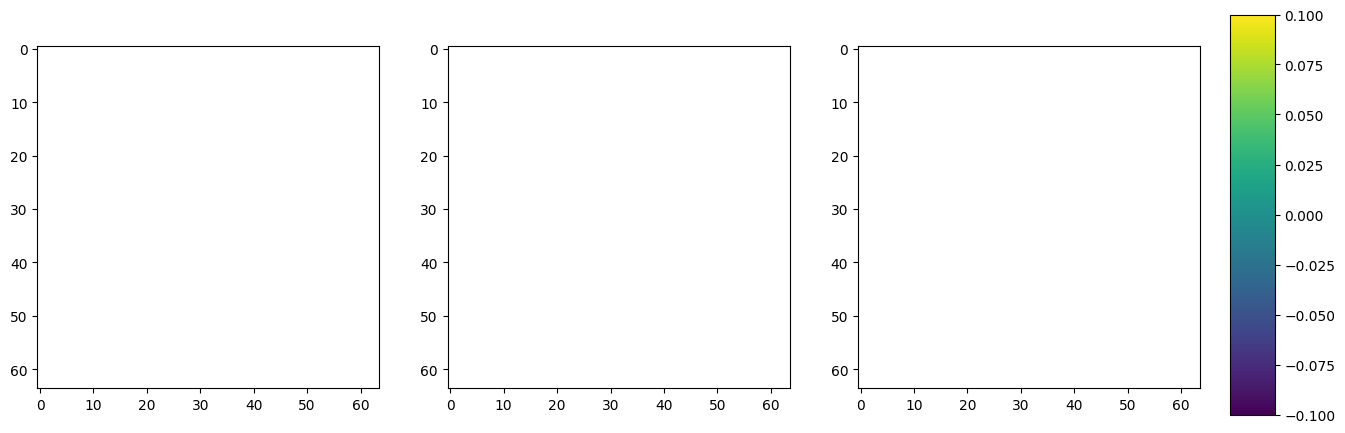

In [47]:
show_data(cl.get_grade(coef * data_norm_cl, 1), 15)